# 1. 기온데이터(seoul.csv)를 활용하여 2개의 질문을 만들고 그 질문에 대한 분석을 진행하는 코드와 결과를 작성하시오.

## 1단계 : 데이터 전처리

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

file = "./data/seoul.csv"
df = pd.read_csv(file, encoding='cp949')
df.tail()
#	날짜	지점	평균기온(℃)	최저기온(℃)	최고기온(℃)
#39921	2018-03-24	108	7.6	4.0	13.1
#39922	2018-03-25	108	9.6	4.6	16.9
#39923	2018-03-26	108	11.0	5.3	18.1
#39924	2018-03-27	108	13.3	7.7	20.0
#39925	2018-03-28	108	14.0	9.4	19.0

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
39921,2018-03-24,108,7.6,4.0,13.1
39922,2018-03-25,108,9.6,4.6,16.9
39923,2018-03-26,108,11.0,5.3,18.1
39924,2018-03-27,108,13.3,7.7,20.0
39925,2018-03-28,108,14.0,9.4,19.0


In [2]:
df['날짜'] = pd.to_datetime(df['날짜']) #날짜 컬럼이 object로 되어 있는 것을 날짜형식으로 변경

In [3]:
df['연도'] = df['날짜'].dt.year #날짜 컬럼에서 연도만 가져오기 
df['월'] = df['날짜'].dt.month #날짜 컬럼에서 월만 가져오기
df['일교차'] = df['최고기온(℃)'] - df['최저기온(℃)'] #일교차 구해서 새로운 컬럼으로 넣기

df['10년 그룹화'] = df['연도'] // 10 
#모든 연도의 월을 이용해 2000년도 까지 확인하기엔 데이터 양이 너무 많음 따라서 10년 단위로 그룹화해서 만듬
#1907 // 10 = 1907 : 1907 / 10 의 몫만 가져옴.
#그렇게 되면 191, 192, 193.. 201 까지 가져올 것. 이는 1910년대 1920년대 .. 2010년대 와 같이 해석이 가능.


df.info() #평균, 최저, 최고 기온에 결측치가 있음을 앎.
#<class 'pandas.core.frame.DataFrame'>
#RangeIndex: 39926 entries, 0 to 39925
#Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
#---  ------   --------------  -----         
# 0   날짜       39926 non-null  datetime64[ns]
# 1   지점       39926 non-null  int64         
# 2   평균기온(℃)  39170 non-null  float64       
# 3   최저기온(℃)  39169 non-null  float64       
# 4   최고기온(℃)  39168 non-null  float64       
# 5   연도       39926 non-null  int64         
# 6   월        39926 non-null  int64         
# 7   10년 그룹화  39926 non-null  int64         
#dtypes: datetime64[ns](1), float64(3), int64(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39926 entries, 0 to 39925
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       39926 non-null  datetime64[ns]
 1   지점       39926 non-null  int64         
 2   평균기온(℃)  39170 non-null  float64       
 3   최저기온(℃)  39169 non-null  float64       
 4   최고기온(℃)  39168 non-null  float64       
 5   연도       39926 non-null  int64         
 6   월        39926 non-null  int64         
 7   일교차      39168 non-null  float64       
 8   10년 그룹화  39926 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 2.7 MB


In [4]:
df.head() #데이터 확인

#날짜	지점	평균기온(℃)	최저기온(℃)	최고기온(℃)	연도	월	10년 그룹화
#0	1907-10-01	108	13.5	7.9	20.7	1907	10	190
#1	1907-10-02	108	16.2	7.9	22.0	1907	10	190
#2	1907-10-03	108	16.2	13.1	21.3	1907	10	190
#3	1907-10-04	108	16.5	11.2	22.0	1907	10	190
#4	1907-10-05	108	17.6	10.9	25.4	1907	10	190

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),연도,월,일교차,10년 그룹화
0,1907-10-01,108,13.5,7.9,20.7,1907,10,12.8,190
1,1907-10-02,108,16.2,7.9,22.0,1907,10,14.1,190
2,1907-10-03,108,16.2,13.1,21.3,1907,10,8.2,190
3,1907-10-04,108,16.5,11.2,22.0,1907,10,10.8,190
4,1907-10-05,108,17.6,10.9,25.4,1907,10,14.5,190


In [5]:
century_19 = df[df['연도'] <= 1999] #1900년대 
century_20 = df[df['연도'] > 1999] #2000년대

# 2. 1900년대 ~ 2000년대 초기 , 중기, 말기 각 월별 평균 기온 박스 플롯 

### 2-1(1). 1900년대 초기 월별 평균 기온 그래프

<AxesSubplot:title={'center':'1900년대 초기 월별 평균 기온'}, xlabel='월', ylabel='평균기온(℃)'>

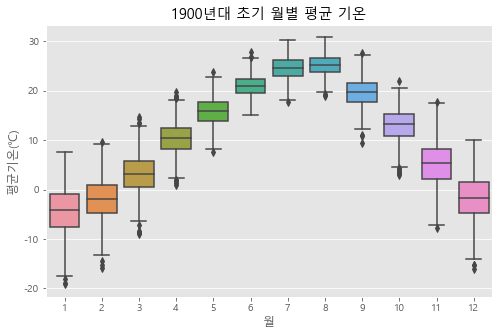

In [6]:
plt.style.use('ggplot') #격자 무늬
plt.subplots(figsize=(8,5)) #사이즈
plt.title("1900년대 초기 월별 평균 기온") #제목
sns.boxplot(x='월', y='평균기온(℃)', data=century_19[century_19['연도'] <= 1933])
#여름엔 6~8월 시간이 지나며 온도는 상승했다. 
#8월에 최고 31~2도가량 도달했다. 8월이 가장 더운 달이었다.

#6월 평균 온도의 중앙값은 22도이고 19도 ~ 23도 사이에 50% 분포한다. 
#7월 평균 온도의 중앙값은 25도이고 23도 ~ 26도 사이에 50% 분포한다.
#8월 평균 온도의 중앙값은 26도이고 24도 ~ 27도 사이에 50% 분포한다.
#9월부터 6월의 온도 분포보다 더 하락한다. 9월 중앙값은 20도이다. 

#겨울엔 1월이 가장 추운것을 확인할 수 있고 1900년대 초기 1월에 -19~-20도 가량 하락한 적이 있다.
#12월 평균 온도의 중앙값은 -3도이고 2도 ~ -5도 사이에 50% 분포한다.
#1월 평균 온도의 중앙갓은 -4도이고 -8도 ~ -1도 사이에 50% 분포한다. 
#2월 평균 온도의 중앙값은 -2도이고 -4도 ~ 2도 사이에 50% 분포한다. 

### 2-1(2). 1900년대 중기 월별 평균 기온 그래프

<AxesSubplot:title={'center':'1900년대 중기 월별 평균 기온'}, xlabel='월', ylabel='평균기온(℃)'>

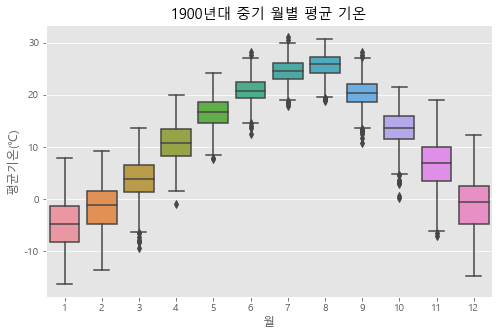

In [7]:
plt.style.use('ggplot')
plt.subplots(figsize=(8,5))
plt.title("1900년대 중기 월별 평균 기온")
sns.boxplot(x='월', y='평균기온(℃)', data=century_19[(century_19['연도'] > 1933) & (century_19['연도'] <= 1966)])
#여름엔 6~8월 시간이 지나며 온도는 상승했다. 7월에 최고 32~3도가량 도달했다. 
#7월은 특별하게 더운 날이 존재했다 == 이상값 존재 하지만 8월이 평균적으로 더 높을 것으로 확인된다.

#6월 평균 온도의 중앙값은 22도이고 19도 ~ 24도 사이에 50% 분포한다. 
#7월 평균 온도의 중앙값은 25도이고 23도 ~ 26도 사이에 50% 분포한다.
#8월 평균 온도의 중앙값은 26도이고 24도 ~ 27도 사이에 50% 분포한다.
#9월부터 6월의 온도 분포처럼 급격히 하락한다. 9월 중앙값은 21도이다. 

#겨울엔 1월이 가장 추운것을 확인할 수 있고 1900년대 중기 1월에 -18도 가량 하락한 적이 있다.
#12월 평균 온도의 중앙값은 -1도이고 3도 ~ -4도 사이에 50% 분포한다.
#1월 평균 온도의 중앙갓은 -5도이고 -8도 ~ -1도 사이에 50% 분포한다. 
#2월 평균 온도의 중앙값은 -2도이고 -5도 ~ 2도 사이에 50% 분포한다. 

### 2-1(3). 1900년대 말기 월별 평균 기온 그래프

<AxesSubplot:title={'center':'1900년도 말기 월별 평균 기온'}, xlabel='월', ylabel='평균기온(℃)'>

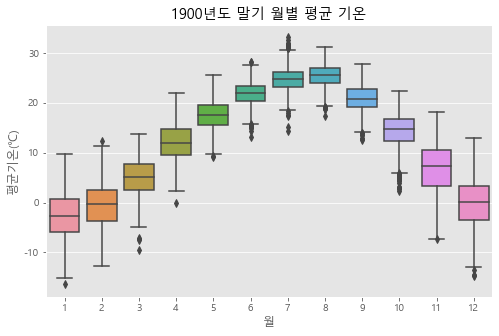

In [8]:
plt.style.use('ggplot')
plt.subplots(figsize=(8,5))
plt.title("1900년도 말기 월별 평균 기온")
sns.boxplot(x='월', y='평균기온(℃)', data=century_19[century_19['연도'] > 1966])
#여름엔 6~8월 시간이 지나며 온도는 상승했다. 7월에 최고 34~5도가량 도달했다. 
#7월은 특별하게 더운 날이 존재했다 == 이상값 존재, 하지만 전체적으로 8월이 더 더움.
#6월 평균 온도의 중앙값은 22도이고 20도 ~ 24도 사이에 50% 분포한다. 
#7월 평균 온도의 중앙값은 25도이고 22도 ~ 26도 사이에 50% 분포한다.
#8월 평균 온도의 중앙값은 26도이고 24도 ~ 27도 사이에 50% 분포한다.
#9월부터 온도가 급격히 하락한다. 9월 중앙값은 22도이다

#겨울엔 1월이 가장 추운것을 확인할 수 있고 1900년대 말기 1월에 -16도 가량 하락한 적이 있다.
#12월 평균 온도의 중앙값은 1도이고 4도 ~ -4도 사이에 50% 분포한다.
#1월 평균 온도의 중앙갓은 -4도이고 -6도 ~ 1도 사이에 50% 분포한다. 
#2월 평균 온도의 중앙값은 -2도이고 -4도 ~ 2도 사이에 50% 분포한다.

### 2-1(4). 2000년대 초기 월별 평균 기온 그래프

<AxesSubplot:title={'center':'2000년도 초기 월별 평균 기온'}, xlabel='월', ylabel='평균기온(℃)'>

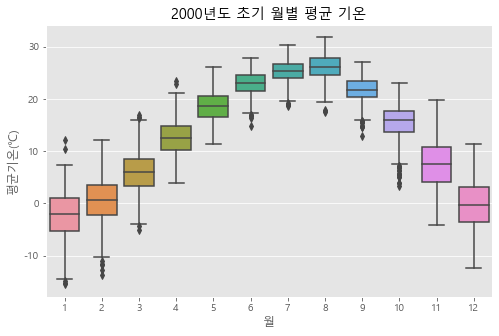

In [9]:
plt.style.use('ggplot')
plt.subplots(figsize=(8,5))
plt.title("2000년도 초기 월별 평균 기온")
sns.boxplot(x='월', y='평균기온(℃)', data=century_20[century_20['연도'] < 2033])
#여름엔 6~8월 시간이 지나며 온도는 상승했다. 8월에 최고 33~4도가량 도달했다. 
#전체적으로 8월이 가장 덥다.
#6월 평균 온도의 중앙값은 23도이고 22도 ~ 25도 사이에 50% 분포한다. 
#7월 평균 온도의 중앙값은 25도이고 24도 ~ 27도 사이에 50% 분포한다.
#8월 평균 온도의 중앙값은 26도이고 25도 ~ 28도 사이에 50% 분포한다.
#9월부터 온도가 급격히 하락한다. 9월 중앙값은 22도이다

#겨울엔 1월이 가장 추운것을 확인할 수 있고 1900년대 말기 1월에 -16도 가량 하락한 적이 있다.
#12월 평균 온도의 중앙값은 -1도이고 3도 ~ -4도 사이에 50% 분포한다.
#1월 평균 온도의 중앙갓은 -3도이고 -5도 ~ 1도 사이에 50% 분포한다. 
#2월 평균 온도의 중앙값은 1도이고 -2도 ~ 3도 사이에 50% 분포한다.

## 1900년도 ~ 2010년도간 10년 단위 평균 기온 박스플롯

<AxesSubplot:title={'center':'1900년도 ~ 2010년도간 10년 단위 평균 기온'}, xlabel='10년 그룹화', ylabel='평균기온(℃)'>

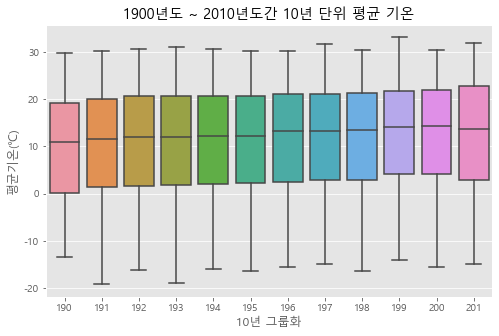

In [10]:
plt.style.use('ggplot')
plt.subplots(figsize=(8,5))
plt.title("1900년도 ~ 2010년도간 10년 단위 평균 기온")
sns.boxplot(x='10년 그룹화', y='평균기온(℃)', data=df)

#1990년도에 최고 온도를 기록했다.
#1900년도는 0~20도 가량 50% 분포하지만 2010년도는 3~23도로 10년 단위 평균 기온 중 50% 분포가 가장 높다.
#50% 분포가 시간이 지날수록 높아지면서 지구온난화가 심화되고 있는 것을 시사한다.

## 2-2. 평균 온도 박스플롯으로 해석한 내용이 맞는지 확인

### 2-2(1). 1900년대 최고온도, 최저온도
> #1994년 7월 24일 33.1도의 평균온도로 20세기 최고 평균온도를 기록했다.
>> #1915년 1월 13일 -19.2도의 평균온도로 20세기 최저 평균온도를 기록했다.

In [11]:
top = 0
bottom = 0
for index in range(len(century_19)):
    if century_19.iloc[index, 2] > top:
        top = century_19.iloc[index, 2]
    if century_19.iloc[index, 2] < bottom:
        bottom = century_19.iloc[index, 2]
print(top) #33.1
print(bottom) #-19.2

33.1
-19.2


In [12]:
print(century_19[century_19.iloc[:, 2] >= top])
print(century_19[century_19.iloc[:, 2] <= bottom])

#              날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)    연도  월  10년 그룹화   일교차
#31277 1994-07-24  108     33.1     28.1     38.4  1994  7      199  10.3
#             날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)    연도  월  10년 그룹화  일교차
#2661 1915-01-13  108    -19.2    -21.3    -16.3  1915  1      191  5.0

#1994년 7월 24일 33.1도의 평균온도로 20세기 최고 평균온도를 기록했다.
#1915년 1월 13일 -19.2도의 평균온도로 20세기 최저 평균온도를 기록했다.

              날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)    연도  월   일교차  10년 그룹화
31277 1994-07-24  108     33.1     28.1     38.4  1994  7  10.3      199
             날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)    연도  월  일교차  10년 그룹화
2661 1915-01-13  108    -19.2    -21.3    -16.3  1915  1  5.0      191


### 2-2(2). 2000년대 최고온도, 최저온도
> #2012년 8월 5일 31.8도의 평균기온으로 최고 온도를 차지했다.
>> #2001년 1월 15일 -15.5도의 평균기온으로 최저 온도를 차지했다.

In [13]:
top = 0
bottom = 0
for index in range(len(century_20)):
    if century_20.iloc[index, 2] > top:
        top = century_20.iloc[index, 2]
    if century_20.iloc[index, 2] < bottom:
        bottom = century_20.iloc[index, 2]
print(top) #31.8
print(bottom) #-15.5

31.8
-15.5


In [14]:
print(century_20[century_20.iloc[:, 2] >= top])
print(century_20[century_20.iloc[:, 2] <= bottom])

#              날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)    연도  월  10년 그룹화  일교차
#37864 2012-08-05  108     31.8     27.5     36.7  2012  8      201  9.2
#              날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)    연도  월  10년 그룹화  일교차
#33644 2001-01-15  108    -15.5    -18.6    -12.4  2001  1      200  6.2

#2012년 8월 5일 31.8도의 평균기온으로 최고 온도를 차지했다.
#2001년 1월 15일 -15.5도의 평균기온으로 최저 온도를 차지했다.

              날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)    연도  월  일교차  10년 그룹화
37864 2012-08-05  108     31.8     27.5     36.7  2012  8  9.2      201
              날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)    연도  월  일교차  10년 그룹화
33644 2001-01-15  108    -15.5    -18.6    -12.4  2001  1  6.2      200


## 1900년도 ~ 2010년도간 초기 중기 말기 일교차 박스플롯

### 3-1. 1900년대 초기 월별 일교차 그래프

<AxesSubplot:title={'center':'1900년대 초기 월별 일교차'}, xlabel='월', ylabel='일교차'>

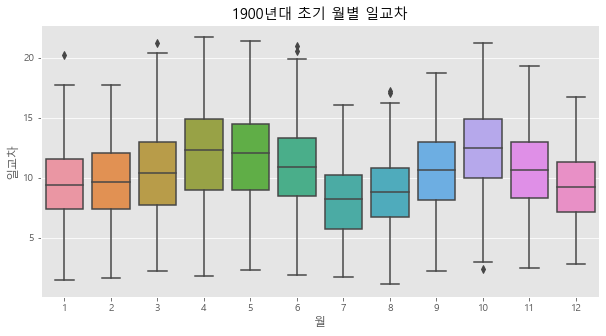

In [15]:
plt.style.use('ggplot') #격자 무늬
plt.subplots(figsize=(10,5)) #사이즈
plt.title("1900년대 초기 월별 일교차") #제목
sns.boxplot(x='월', y='일교차', data=century_19[century_19['연도'] <= 1933])

#확실히 봄, 가을에 20도 이상 차이가 난다.

### 3-2. 1900년대 중기 월별 일교차 그래프

<AxesSubplot:title={'center':'1900년대 중기 월별 일교차'}, xlabel='월', ylabel='일교차'>

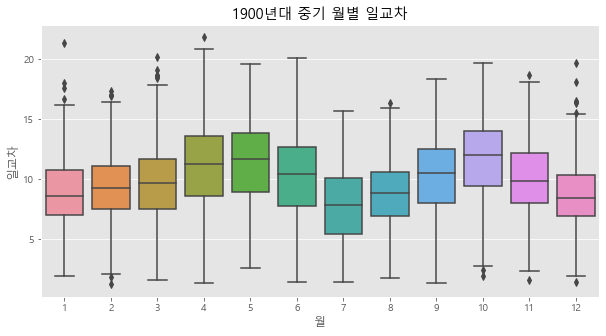

In [16]:
plt.style.use('ggplot') #격자 무늬
plt.subplots(figsize=(10,5)) #사이즈
plt.title("1900년대 중기 월별 일교차") #제목
sns.boxplot(x='월', y='일교차', data=century_19[(century_19['연도'] > 1933) & (century_19['연도'] <= 1966)])

#봄에 일교차가 심했다.
#1900년도 중기 6월 21도 가량 차이가 났었던 적이 있다.
#1900년도 중기의 4월에 가장 크게 차이 났다.

   ### 3-3. 1900년대 말기 월별 일교차 그래프

<AxesSubplot:title={'center':'1900년대 말기 월별 일교차'}, xlabel='월', ylabel='일교차'>

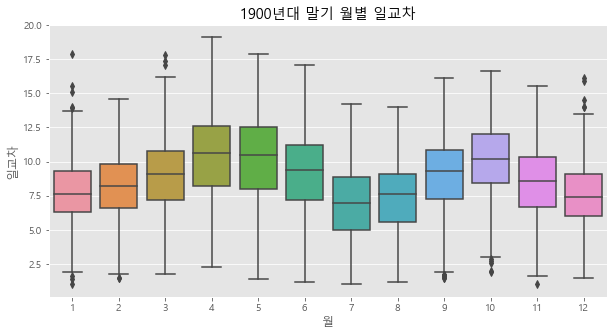

In [17]:
plt.style.use('ggplot') #격자 무늬
plt.subplots(figsize=(10,5)) #사이즈
plt.title("1900년대 말기 월별 일교차") #제목
sns.boxplot(x='월', y='일교차', data=century_19[century_19['연도'] > 1966])

#봄에 가장 일교차가 크다.
#봄에는 19도 가량 차이가 났던 적이 있다.
#가을엔 17도 가량 차이 났었다.

### 3-4. 2000년대 초기 월별 일교차 그래프

<AxesSubplot:title={'center':'2000년대 초기 월별 일교차'}, xlabel='월', ylabel='일교차'>

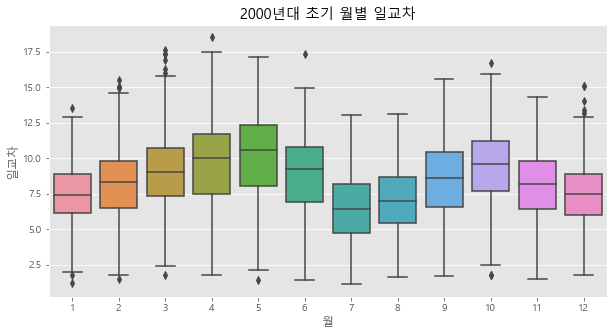

In [18]:
plt.style.use('ggplot') #격자 무늬
plt.subplots(figsize=(10,5)) #사이즈
plt.title("2000년대 초기 월별 일교차") #제목
sns.boxplot(x='월', y='일교차', data=century_20[century_20['연도'] <= 2033])

#봄에 가장 일교차가 크다.
#4월에 18도 가량 차이났었다.

## 일교차 박스플롯으로 해석한 내용이 맞는지 확인

In [24]:
top = 0
bottom = 10
for index in range(len(df)):
    if df.iloc[index, -2] > top:
        top = df.iloc[index, -2]
    if df.iloc[index, -2] < bottom:
        bottom = df.iloc[index, -2]
        
print(top) #가장 심했던 일교차는 21.8도이다.
print(bottom) #가장 변하지 않은 일교차는 1도다.

21.8
1.0


In [26]:
print(df[df.iloc[:, -2] >= 21.8])
print(df[df.iloc[:, -2] <= 1])
#              날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)    연도  월  10년 그룹화   일교차
#3863  1918-04-29  108     16.7      4.6     26.3  1918  4      191  21.7
#12619 1942-04-19  108     12.7      2.5     24.3  1942  4      194  21.8
#              날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)    연도   월  10년 그룹화  일교차
#21968 1969-01-27  108     -0.1     -0.4      0.6  1969   1      196  1.0
#29556 1989-11-06  108     12.3     11.8     12.8  1989  11      198  1.0
#32724 1998-07-10  108     24.0     23.6     24.6  1998   7      199  1.0

#21.8도의 일교차를 가진 날은 1942년도 4월 19일이다. 
#해당 날짜의 최고기온은 24,3도였고 최저기온은 2.5도였다. 

#1도의 일교차를 가진 날은 3번있다.
#1969년 1월 27일, 1989년 11월 6일, 1998년 7월 10일이다.
#각 최고 기온 [0.6, 12.8, 24.6], 최저 기온 [-0.4, 11.8, 23.6]이다.

              날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)    연도  월   일교차  10년 그룹화
12619 1942-04-19  108     12.7      2.5     24.3  1942  4  21.8      194
              날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)    연도   월  일교차  10년 그룹화
21968 1969-01-27  108     -0.1     -0.4      0.6  1969   1  1.0      196
29556 1989-11-06  108     12.3     11.8     12.8  1989  11  1.0      198
32724 1998-07-10  108     24.0     23.6     24.6  1998   7  1.0      199


# 결론

1. 전체적으로 평균 기온은 8월이 높다.
2. 1990년도에 최고 평균 온도를 기록했다. (1994년 7월 24일 33.1도로 차지)
3. 1910년도에 최저 평균 온도를 기록했다. (1915년 1월 13일 -19.2도로 차지)
4. 시간이 흐름에 따라 평균 온도 50% 분포가 높아지고 있어 지구온난화가 심화되고 있다.
5. 일교차는 봄이 가장 크고 다음 가을이 크다
6. 그 중 4월이 일교차가 가장 크다
7. 1942년 4월 19일 21.8도의 일교차로 가장 큰 일교차를 차지